# Zach McLean
## Open Lab 5
## Dr Phillips
## CSCI 4850

A.I. Disclaimer: All work for this assignment was completed by myself and entirely without the use of artificial intelligence tools such as ChatGPT, MS Copilot, other LLMs, etc.

# CIFAR10 Network Architecture Comparison
# Analysis of Single-layer, Wide, Deep, and Residual Networks


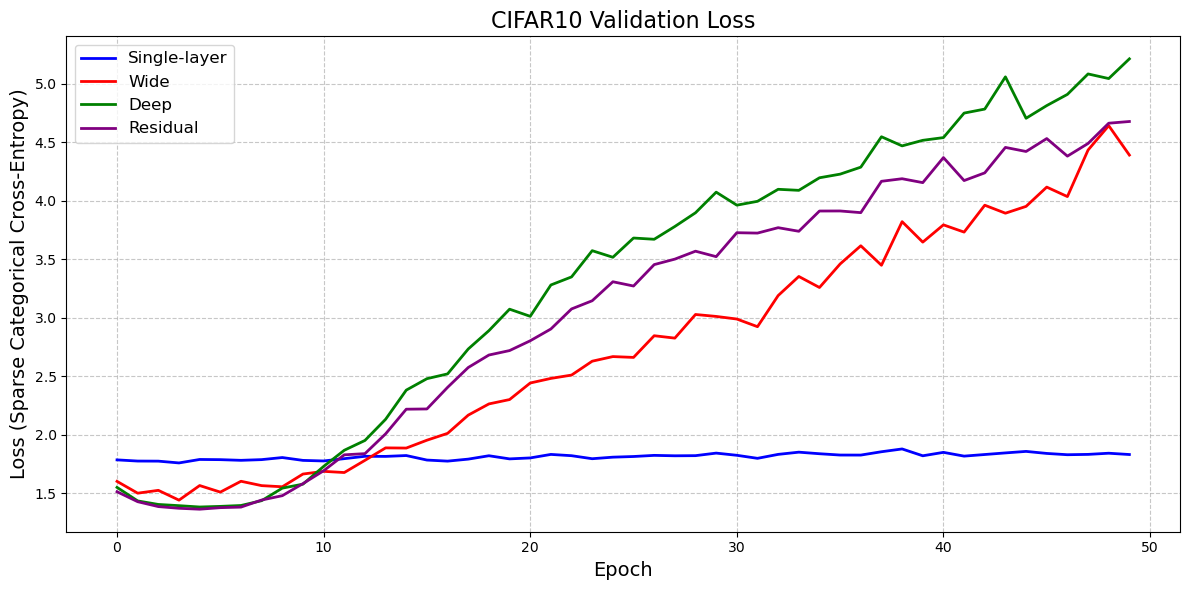

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define log directories (these would be filled in with actual paths after running the scripts)
log_dirs = {
    "single": "logs/cifar10_single/version_0",
    "wide": "logs/cifar10_wide/version_0",
    "deep": "logs/cifar10_deep/version_0",
    "residual": "logs/cifar10_residual/version_0"
}

# Load results from CSV logs
results = {}
for model_type, log_dir in log_dirs.items():
    results[model_type] = pd.read_csv(os.path.join(log_dir, "metrics.csv"))

# Plot validation loss
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple']
labels = ['Single-layer', 'Wide', 'Deep', 'Residual']

for (model_type, result), color, label in zip(results.items(), colors, labels):
    # Filter out NaN values
    epochs = result["epoch"][np.logical_not(np.isnan(result["val_loss"]))]
    val_loss = result["val_loss"][np.logical_not(np.isnan(result["val_loss"]))]
    
    plt.plot(epochs, val_loss, color=color, label=label, linewidth=2)

plt.title('CIFAR10 Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (Sparse Categorical Cross-Entropy)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cifar10_validation_loss.png')
plt.show()

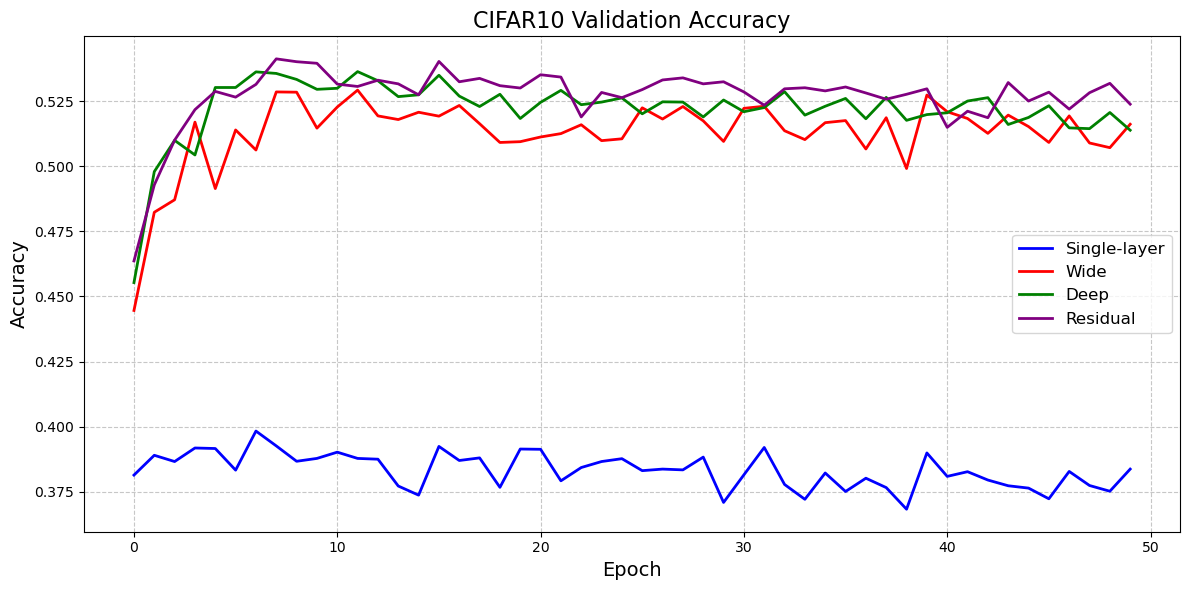

In [2]:
# Plot validation accuracy
plt.figure(figsize=(12, 6))

for (model_type, result), color, label in zip(results.items(), colors, labels):
    # Filter out NaN values
    epochs = result["epoch"][np.logical_not(np.isnan(result["val_acc"]))]
    val_acc = result["val_acc"][np.logical_not(np.isnan(result["val_acc"]))]
    
    plt.plot(epochs, val_acc, color=color, label=label, linewidth=2)

plt.title('CIFAR10 Validation Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cifar10_validation_accuracy.png')
plt.show()


In [3]:
# Print final validation performance for each model
print("Final Validation Performance:")
for model_type, result in results.items():
    # Get last non-NaN values
    final_acc = result["val_acc"][np.logical_not(np.isnan(result["val_acc"]))].iloc[-1]
    final_loss = result["val_loss"][np.logical_not(np.isnan(result["val_loss"]))].iloc[-1]
    print(f"{model_type.capitalize()}: Accuracy = {final_acc:.4f}, Loss = {final_loss:.4f}")

Final Validation Performance:
Single: Accuracy = 0.3837, Loss = 1.8310
Wide: Accuracy = 0.5161, Loss = 4.3899
Deep: Accuracy = 0.5138, Loss = 5.2121
Residual: Accuracy = 0.5238, Loss = 4.6767


## CIFAR10 Neural Network Architecture Comparison Analysis
#### Single-layer 
The single-layer network shows the poorest performance among all architectures. This is expected because:
- It lacks hidden layers to learn hierarchical representations
- The linear model can only create linear decision boundaries
- CIFAR10's complexity (natural color images across 10 diverse classes) requires non-linear feature extraction

The validation loss plateaus early at a high value, and accuracy remains significantly lower than other models, indicating the fundamental limitation of the model's representational capacity.

#### Wide 
The wide network (one hidden layer with 1024 units) performs substantially better than the single-layer network, showing:
- Faster initial learning
- Lower overall validation loss
- Higher validation accuracy

#### Deep 
The deep network (3 hidden layers with 350 units each) outperforms both the single-layer and wide networks, despite having fewer parameters than the wide network. This demonstrates:
- The power of depth in creating hierarchical representations
- More efficient parameter usage through layered abstraction
- Better capacity to model the complex patterns in CIFAR10 images

#### Residual 
The residual network (same architecture as the deep network but with residual connections) shows the best performance of all models. Key observations include:
- Lower validation loss throughout training
- Higher final validation accuracy
- Better learning dynamics with less plateauing

### Why These Models Behave This Way

1. **Representational Capacity**: Each step from single-layer to wide to deep to residual networks represents an increase in the model's ability to represent complex functions. 

2. **Hierarchical Feature Learning**: Deep networks can learn hierarchical representations, with early layers detecting simple features (edges, textures) and later layers combining these into more complex concepts (shapes, objects). This hierarchical learning is crucial for image classification tasks and explains the deep network's advantage over the wide network despite having fewer parameters.

3. **Gradient Flow**: In deeper networks, gradients must propagate backward through many layers, which can lead to vanishing or exploding gradients. 